# EDA CAB

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

## Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

* Review the Source Documentation
* Understand the field names and data types
* Identify relationships across the files
* Field/feature transformations
* Determine which files should be joined versus which ones should be appended
* Create master data and explain the relationship
* Identify and remove duplicates
* Perform other analysis like NA value and outlier detection

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import xlrd

# Dataset & Cleanning

In [2]:
df_cab=pd.read_csv('Cab_Data.csv')
df_city=pd.read_csv('City.csv')
df_cus=pd.read_csv('Customer_ID.csv')
df_tran=pd.read_csv('Transaction_ID.csv')

## CAB

In [3]:
df_cab.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [4]:
print(df_cab.isnull().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


In [5]:
df_cab['Date_of_Travel']=np.nan
df_cab['Year']=np.nan
df_cab['Month']=np.nan

for i in range(len(df_cab['Date of Travel'])):
  excel_date = df_cab['Date of Travel'][i]
  python_date = datetime.datetime(*xlrd.xldate_as_tuple(excel_date, 0)).strftime('%Y-%m-%d')
  df_cab['Date_of_Travel'][i]=python_date
  df_cab['Year'][i]=int(python_date.split('-')[0])
  df_cab['Month'][i]=int(python_date.split('-')[1])

In [6]:
df_cab.drop(columns=['Date of Travel'], inplace=True)

In [7]:
df_cab['Date_of_Travel'] = pd.to_datetime(df_cab['Date_of_Travel'],format= '%Y-%m-%d' ).dt.date

In [8]:
df_cab.head()

Transaction ID   Company        City  KM Travelled  Price Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost of Trip Date_of_Travel    Year  Month  
0       313.635     2016-01-08  2016.0    1.0  
1       334.854     2016-01-06  2016.0    1.0  
2        97.632     2016-01-02  2016.0    1.0  
3       351.602     2016-01-07  2016.0    1.0  
4        97.776     2016-01-03  2016.0    1.0

In [9]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Company         359392 non-null  object 
 2   City            359392 non-null  object 
 3   KM Travelled    359392 non-null  float64
 4   Price Charged   359392 non-null  float64
 5   Cost of Trip    359392 non-null  float64
 6   Date_of_Travel  359392 non-null  object 
 7   Year            359392 non-null  float64
 8   Month           359392 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 24.7+ MB


## City

In [10]:
df_city.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [11]:
print(df_city.isnull().sum())

City          0
Population    0
Users         0
dtype: int64


In [ ]:
df_city['PopulationN']=np.nan
df_city['UsersN']=np.nan

for i in range(len(df_city['Users'])):
  po = df_city['Population'][i].strip(' ').split(',')
  df_city['PopulationN'][i]=int(''.join(po))
  #
  us = df_city['Users'][i].strip(' ').split(',')
  df_city['UsersN'][i]=int(''.join(us))

In [13]:
df_city.drop(columns=['Population','Users'], inplace=True)

In [14]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         20 non-null     object 
 1   PopulationN  20 non-null     float64
 2   UsersN       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


## Custumer

In [15]:
df_cus.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [16]:
print(df_cus.isnull().sum())

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [17]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Transaction

In [18]:
df_tran.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [19]:
print(df_tran.isnull().sum())

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [20]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## Merge data

In [21]:
print("shape of Cab_Data", df_cab.shape)
print("shape of Customer_ID", df_cus.shape)
print("shape of Transaction_ID", df_tran.shape)
print("shape of City Data", df_city.shape)

shape of Cab_Data (359392, 9)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [22]:
df = df_cab.merge(df_tran, on= 'Transaction ID').merge(df_cus, on ='Customer ID').merge(df_city, on = 'City')

In [23]:
print(df.isnull().sum())

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Date_of_Travel        0
Year                  0
Month                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
PopulationN           0
UsersN                0
dtype: int64


In [24]:
df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [ ]:
df[df['Company']=='Pink Cab'].describe()

In [ ]:
df[df['Company']=='Yellow Cab'].describe()

## Outliers

In [39]:
def showIQRstats(df_stats,df_master,column, name):
    
    mean   = df_stats[column][1]
    median = df_stats[column][5]
    median_mean_ratio = median/mean
    Q1     = df_stats[column][4]
    Q3     = df_stats[column][6]
    IQR    = Q3-Q1
    upper_band = Q3 + 1.5*IQR
    lower_band = Q1 - 1.5*IQR
    
    print('\n\n' + "mean of : " + str(column) + " is " + str(mean) +
          '\n' + "median of : " + str(column) + " is " + str(median) +
          '\n' + "median/mean ratio of : " +  str(column) + " is " + str(median_mean_ratio) +
          '\n' + "Q1 value of : "  + str(column) + " is "  + str(Q1) +
          '\n' + "Q3 value of : "  + str(column) + " is "  + str(Q3) + 
          '\n' + "IQR value of : " + str(column) + " is " + str(IQR) + 
          '\n' + "Upper and Lower Limits of " + str(column) + " is "  + str((lower_band,upper_band))
         )
    
    #fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
    plt.figure(figsize=(10,8))
    plt.title('Boxplot Distributions of the Variables')
    sns.boxplot(x=column , data=df_master).set_ylabel(name)

    return upper_band , lower_band

In [28]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Date_of_Travel', 'Year', 'Month', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'PopulationN',
       'UsersN'],
      dtype='object')

In [ ]:
numerical_columns = ['KM Travelled','Price Charged','Cost of Trip', 'Age' ,'Income (USD/Month)', 'PopulationN' , 'UsersN']
df_pink =df[df['Company']=='Pink Cab']
Pink_MasterData=df_pink[numerical_columns]
Pink_Cab_Stats = Pink_MasterData.describe()
name='Pink Cab'
print('Statistical infos of Pink Cab Firm :')
for column in numerical_columns :
    upper_band , lower_band = showIQRstats(Pink_Cab_Stats, Pink_MasterData , column, name)
    outliers = Pink_MasterData[(Pink_MasterData[column] < lower_band) | (Pink_MasterData[column] > upper_band)][column].values
    if len(outliers)!=0:
      print('\n' + str(column) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
      print('\n\n**********************************************************\n')

In [ ]:
numerical_columns = ['KM Travelled','Price Charged','Cost of Trip', 'Age' ,'Income (USD/Month)', 'PopulationN' , 'UsersN']
df_yellow =df[df['Company']=='Yellow Cab']
Yellow_MasterData=df_pink[numerical_columns]
Yellow_Cab_StatsInfo = Yellow_MasterData.describe()
name='Yellow Cab'
print('Statistical infos of Yellow Cab Firm :')
for column_name in numerical_columns :
    upper_band , lower_band = showIQRstats(Yellow_Cab_StatsInfo, Yellow_MasterData , column, name)
    outliers = Yellow_MasterData[(Yellow_MasterData[column_name] < lower_band) | (Yellow_MasterData[column_name] > upper_band)][column_name].values
    if len(outliers)!=0:
      print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
      print('\n\n**********************************************************\n')

Text(0, 0.5, 'Yellow Cab')

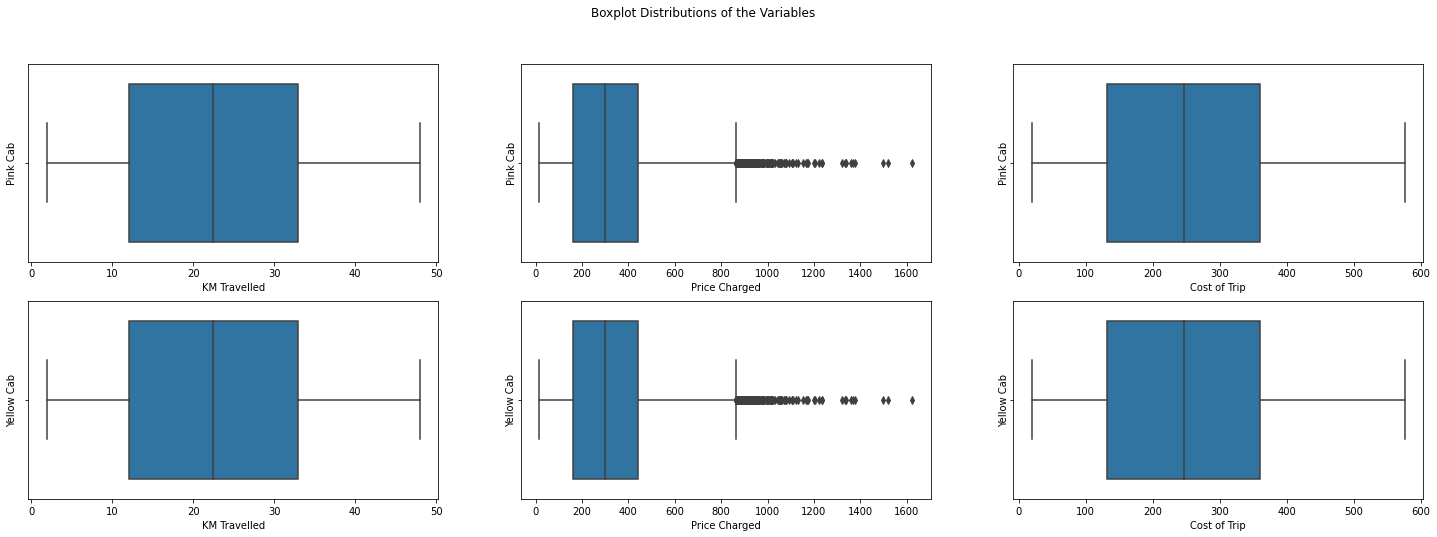

In [42]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM Travelled' ,        data=Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price Charged'   ,     data=Pink_MasterData  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost of Trip' ,        data=Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM Travelled' ,        data=Yellow_MasterData ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price Charged'   ,     data=Yellow_MasterData  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost of Trip' ,        data=Yellow_MasterData ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

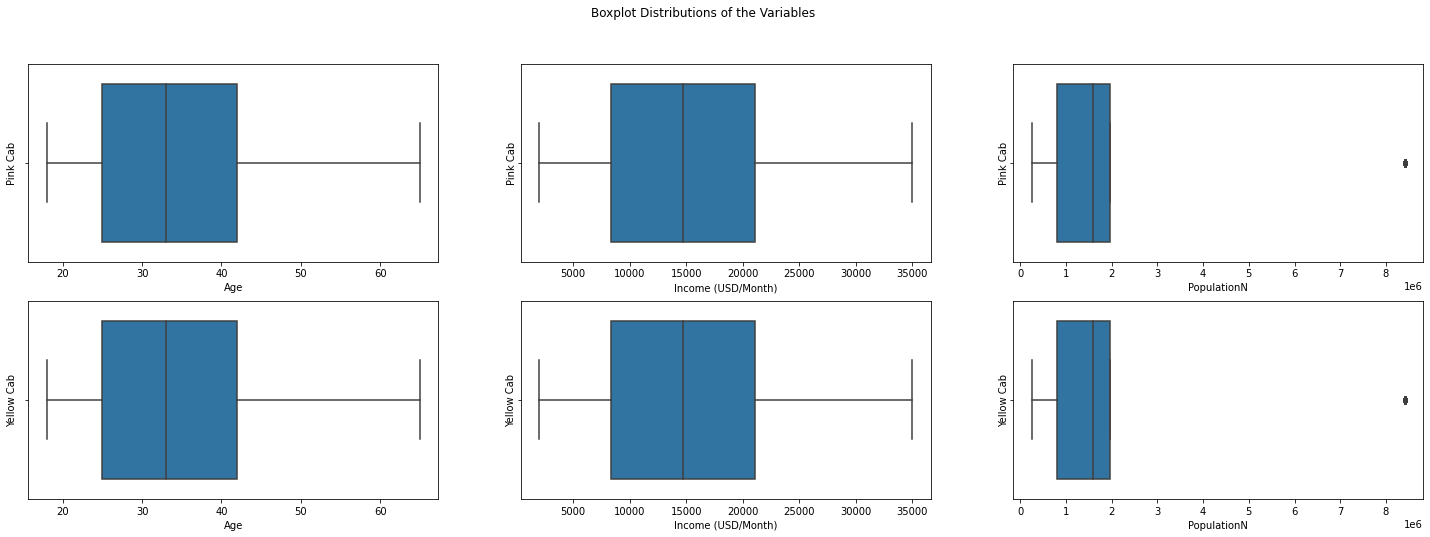

In [43]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Age' ,                 data=Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Income (USD/Month)' ,  data=Pink_MasterData  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='PopulationN' ,          data=Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Age' ,                 data=Yellow_MasterData ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Income (USD/Month)' ,  data=Yellow_MasterData  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='PopulationN' ,          data=Yellow_MasterData ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

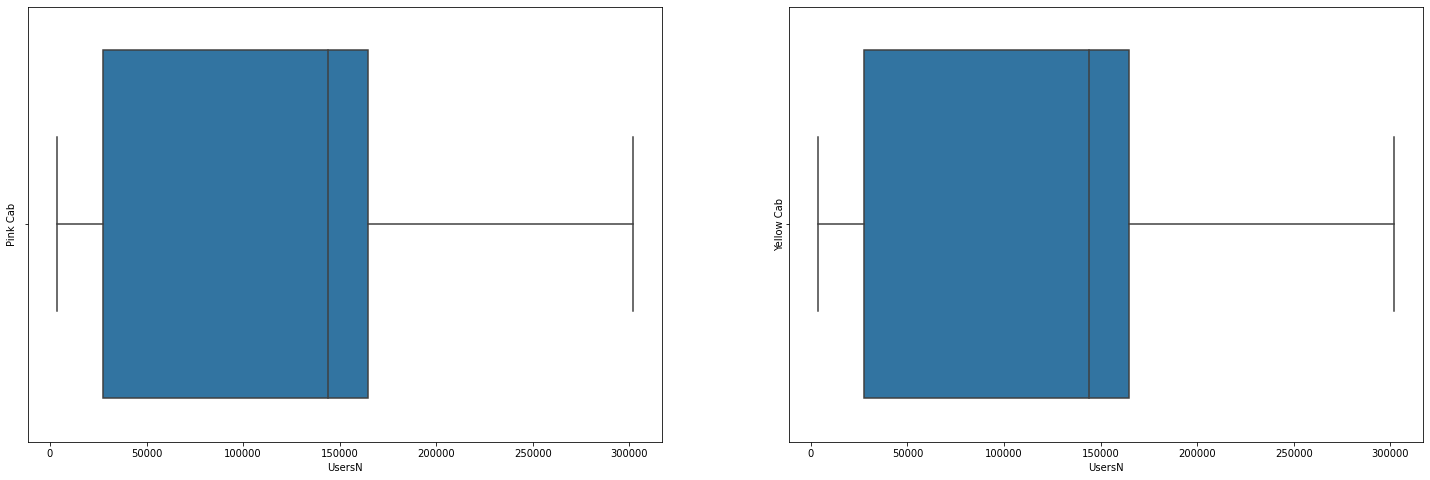

In [44]:
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
sns.boxplot(ax=axes[0], x='UsersN' ,    data=Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1], x='UsersN'   ,  data=Yellow_MasterData  ) .set_ylabel("Yellow Cab")

# EDA

Analysis

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

* Which company has maximum cab users at a particular time period?
* Does margin proportionally increase with increase in number of customers?
* What are the attributes of these customer segments?

Although not required, we encourage you to document the process and findings

* What is the business problem?
* What are the properties of the data provided (data intake report)
* What steps did you take in order to create an applicable data set?
* How did you prepare and perform your analysis?
* What type of analysis did you perform?
* Why did you choose to use certain analytical techniques over others?
* What were the results?

In [2]:
df=pd.read_csv('dat_clea.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Date_of_Travel      359392 non-null  object 
 7   Year                359392 non-null  float64
 8   Month               359392 non-null  float64
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
 14  PopulationN         359392 non-null  float64
 15  UsersN              359392 non-nul

In [4]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df["User_Pop_Ratio"] = df["UsersN"] / df["PopulationN"]
df["Profit per KM"] = df["Profit"].sum() / df["KM Travelled"].sum()

## Categorical variable

In [47]:
sns.set(style="white", palette="rainbow")

In [55]:
def fun_count(data,catvar):
  ax = sns.countplot(x=catvar,data=data, palette='Set1')
  total = float(len(data))

  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center")

  plt.ylabel('Frequency',fontsize = 14);
  #plt.xlabel(fontsize = 14)

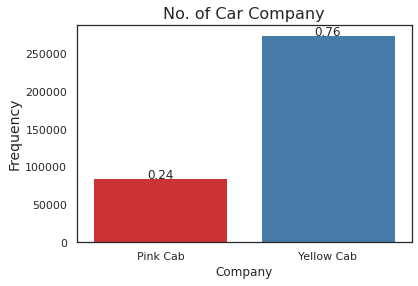

In [56]:
fun_count(df,'Company')
plt.title('No. of Car Company',fontsize = 16);

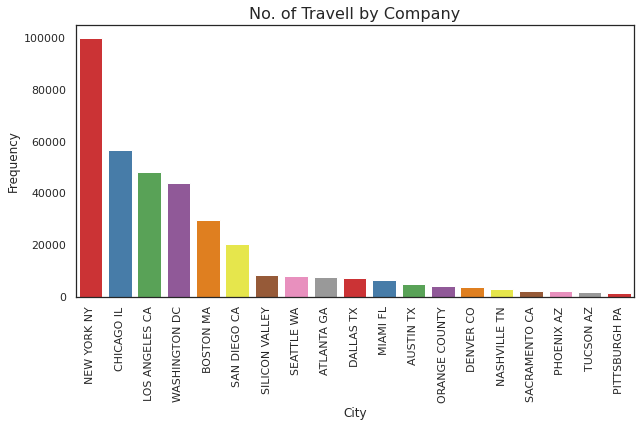

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x='City',data=df, palette='Set1',order=df['City'].value_counts().index)
plt.xticks(rotation="90")
plt.ylabel('Frequency')
plt.title('No. of Travell by Company',fontsize = 16);

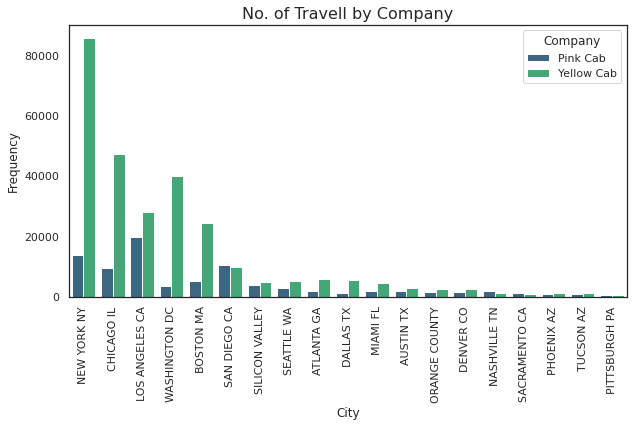

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x='City',data=df, palette='viridis',order=df['City'].value_counts().index, hue='Company')
plt.xticks(rotation="90")
plt.ylabel('Frequency')
plt.title('No. of Travell by Company',fontsize = 16);

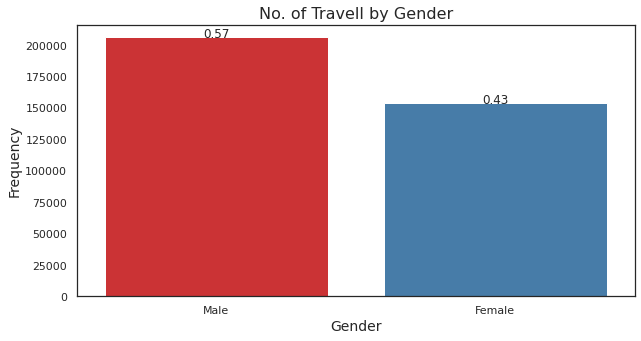

In [73]:
plt.figure(figsize=(10,5))
fun_count(df,'Gender')
plt.xlabel('Gender',fontsize = 14)
plt.title('No. of Travell by Gender',fontsize = 16);

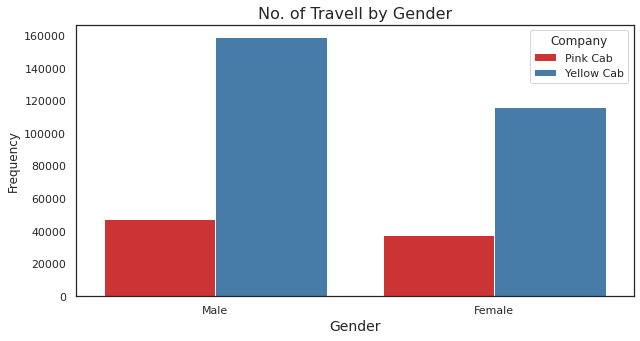

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df, palette='Set1',order=df['Gender'].value_counts().index, hue='Company')
plt.ylabel('Frequency')
plt.xlabel('Gender',fontsize = 14)
plt.title('No. of Travell by Gender',fontsize = 16);

In [75]:
#sns.countplot(x='Age',data=df, palette='Set1')
#plt.xticks(rotation="90")
#plt.ylabel('Frequency');

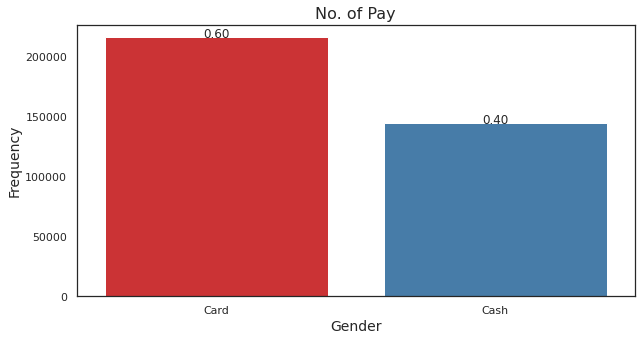

In [78]:
plt.figure(figsize=(10,5))
fun_count(df,'Payment_Mode')
plt.ylabel('Frequency')
plt.xlabel('Gender',fontsize = 14)
plt.title('No. of Pay',fontsize = 16);

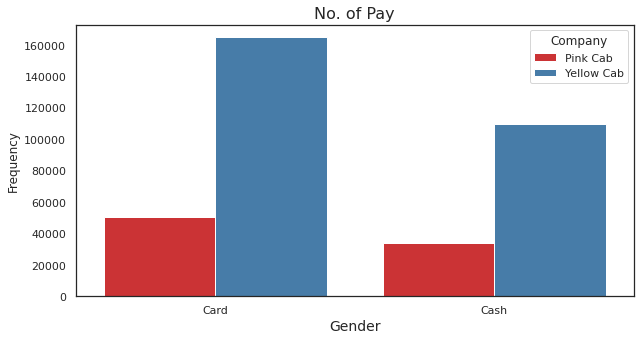

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(x='Payment_Mode',data=df, palette='Set1', hue='Company')
plt.ylabel('Frequency')
plt.xlabel('Gender',fontsize = 14)
plt.title('No. of Pay',fontsize = 16);

## Numerical variable

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Date_of_Travel      359392 non-null  object 
 7   Year                359392 non-null  float64
 8   Month               359392 non-null  float64
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
 14  PopulationN         359392 non-null  float64
 15  UsersN              359392 non-nul

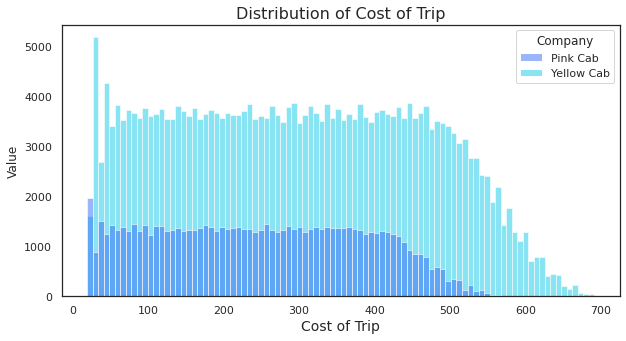

In [82]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Cost of Trip',hue='Company')
plt.ylabel('Value')
plt.xlabel('Cost of Trip',fontsize = 14)
plt.title('Distribution of Cost of Trip',fontsize = 16);

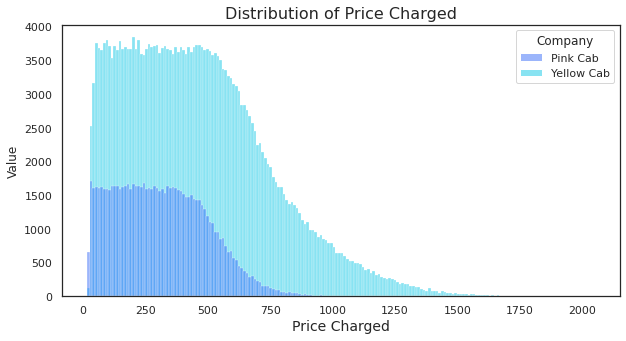

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Price Charged',hue='Company')
plt.ylabel('Value')
plt.xlabel('Price Charged',fontsize = 14)
plt.title('Distribution of Price Charged',fontsize = 16);

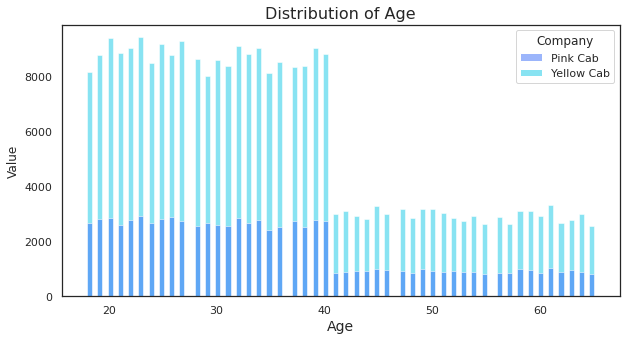

In [84]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age',hue='Company')
plt.ylabel('Value')
plt.xlabel('Age',fontsize = 14)
plt.title('Distribution of Age',fontsize = 16);

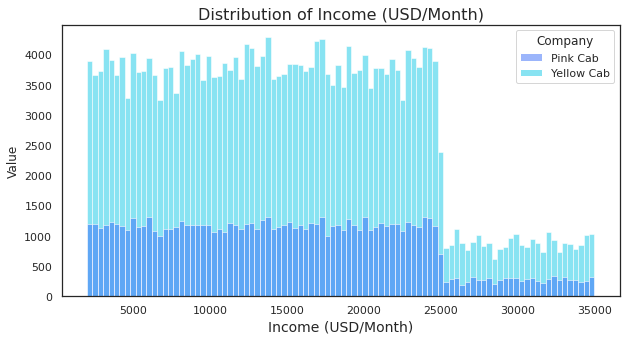

In [85]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Income (USD/Month)',hue='Company')
plt.ylabel('Value')
plt.xlabel('Income (USD/Month)',fontsize = 14)
plt.title('Distribution of Income (USD/Month)',fontsize = 16);

In [86]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Date_of_Travel', 'Year', 'Month', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'PopulationN',
       'UsersN', 'Profit', 'User_Pop_Ratio', 'Profit per KM'],
      dtype='object')

In [87]:
dftime=df.copy() #set_index('Date_of_Travel')

In [88]:
dftime['Date'] = pd.to_datetime(df['Date_of_Travel'])
dftime_month = dftime.resample('MS', on='Date').sum()

dftime['Date'] = pd.to_datetime(df[df['Company']=='Pink Cab']['Date_of_Travel'])
dftime_month_pink = dftime.resample('MS', on='Date').sum()

dftime['Date'] = pd.to_datetime(df[df['Company']=='Yellow Cab']['Date_of_Travel'])
dftime_month_yellow = dftime.resample('MS', on='Date').sum()

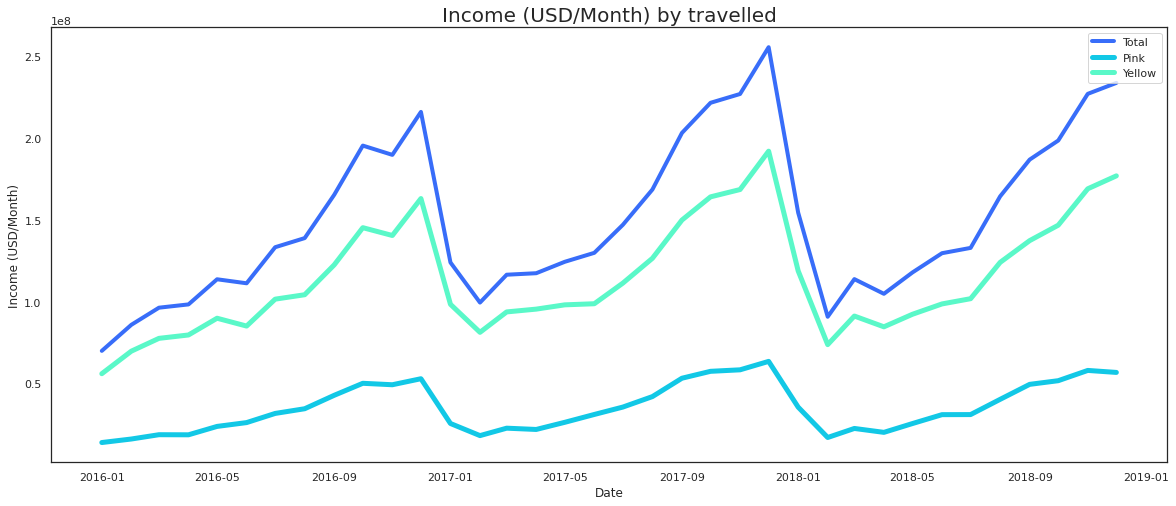

In [121]:
plt.figure(figsize=(20,8))
sns.lineplot(data=dftime_month['Income (USD/Month)'], label='Total',lw=4)
sns.lineplot(data=dftime_month_pink['Income (USD/Month)'], label='Pink', lw=5)
sns.lineplot(data=dftime_month_yellow['Income (USD/Month)'], label='Yellow', lw=5)
plt.title('Income (USD/Month) by travelled', fontsize=20)
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

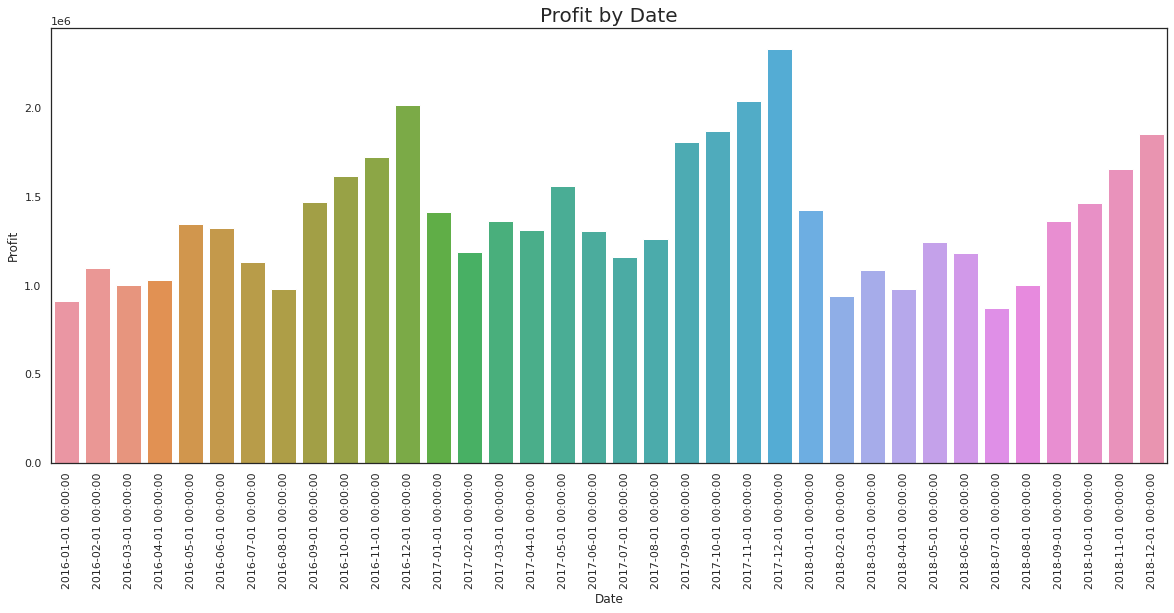

In [122]:
plt.figure(figsize=(20,8))
sns.barplot(x=dftime_month.index, y=dftime_month.Profit ,data=dftime_month)
plt.title('Profit by Date', fontsize=20)
plt.xticks(rotation='90')

In [133]:
profit_month = df.groupby(['Month'])
prof_month = profit_month.sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

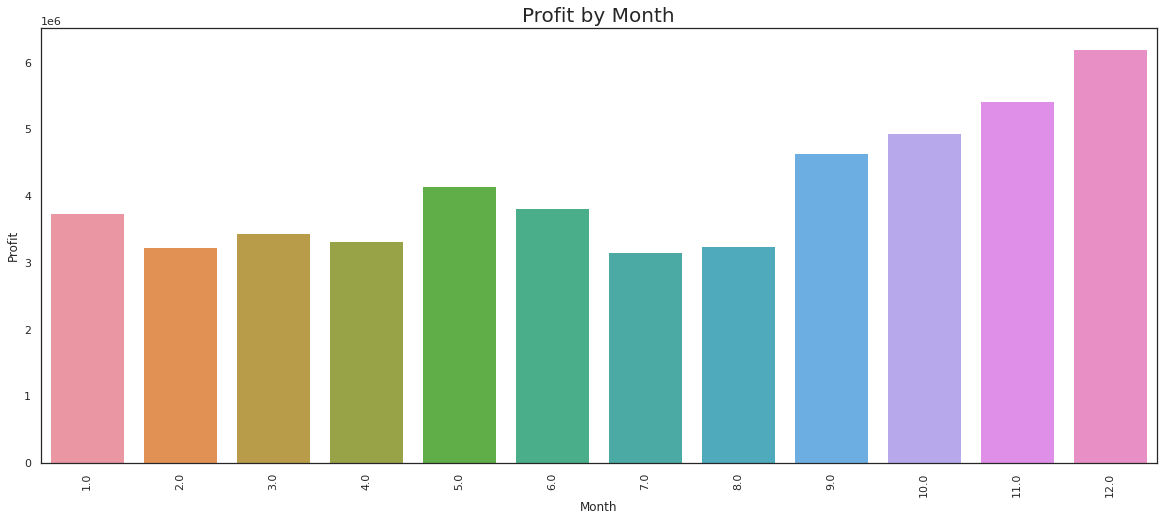

In [137]:
plt.figure(figsize=(20,8))
sns.barplot(x=prof_month.index, y=prof_month.Profit ,data=prof_month)
plt.title('Profit by Month', fontsize=20)
plt.xticks(rotation='90')

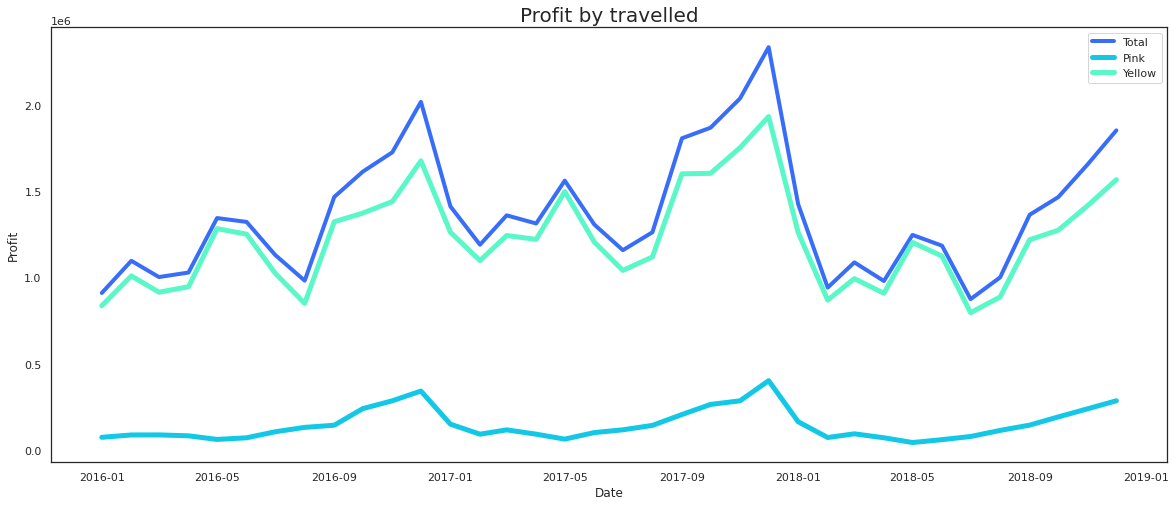

In [123]:
plt.figure(figsize=(20,8))
sns.lineplot(data=dftime_month['Profit'], label='Total',lw=4)
sns.lineplot(data=dftime_month_pink['Profit'], label='Pink',lw=5)
sns.lineplot(data=dftime_month_yellow['Profit'], label='Yellow',lw=5)
plt.title('Profit by travelled', fontsize=20)
plt.legend()

In [105]:
dftime['Date'] = pd.to_datetime(df['Date_of_Travel'])
dftime_year = dftime.resample('Y', on='Date').sum()

dftime['Date'] = pd.to_datetime(df[df['Company']=='Pink Cab']['Date_of_Travel'])
dftime_year_pink = dftime.resample('Y', on='Date').sum()

dftime['Date'] = pd.to_datetime(df[df['Company']=='Yellow Cab']['Date_of_Travel'])
dftime_year_yellow = dftime.resample('Y', on='Date').sum()

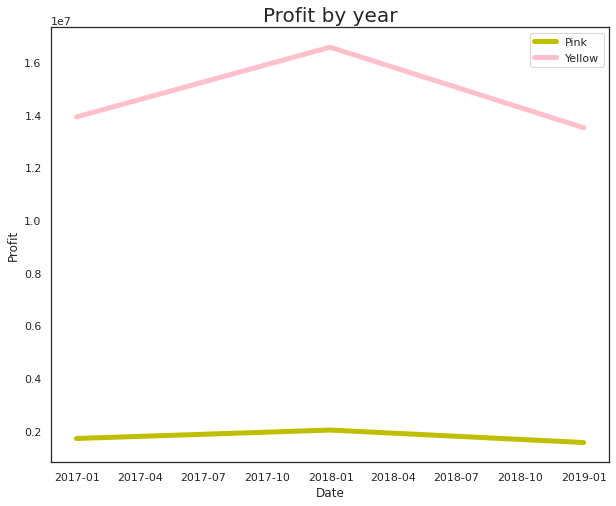

In [140]:
plt.figure(figsize=(10,8))
sns.lineplot(data=dftime_year_pink['Profit'], label='Pink', color='y',lw=5)
sns.lineplot(data=dftime_year_yellow['Profit'], label='Yellow', color='pink',lw=5)
plt.title('Profit by year', fontsize=20)
plt.legend()

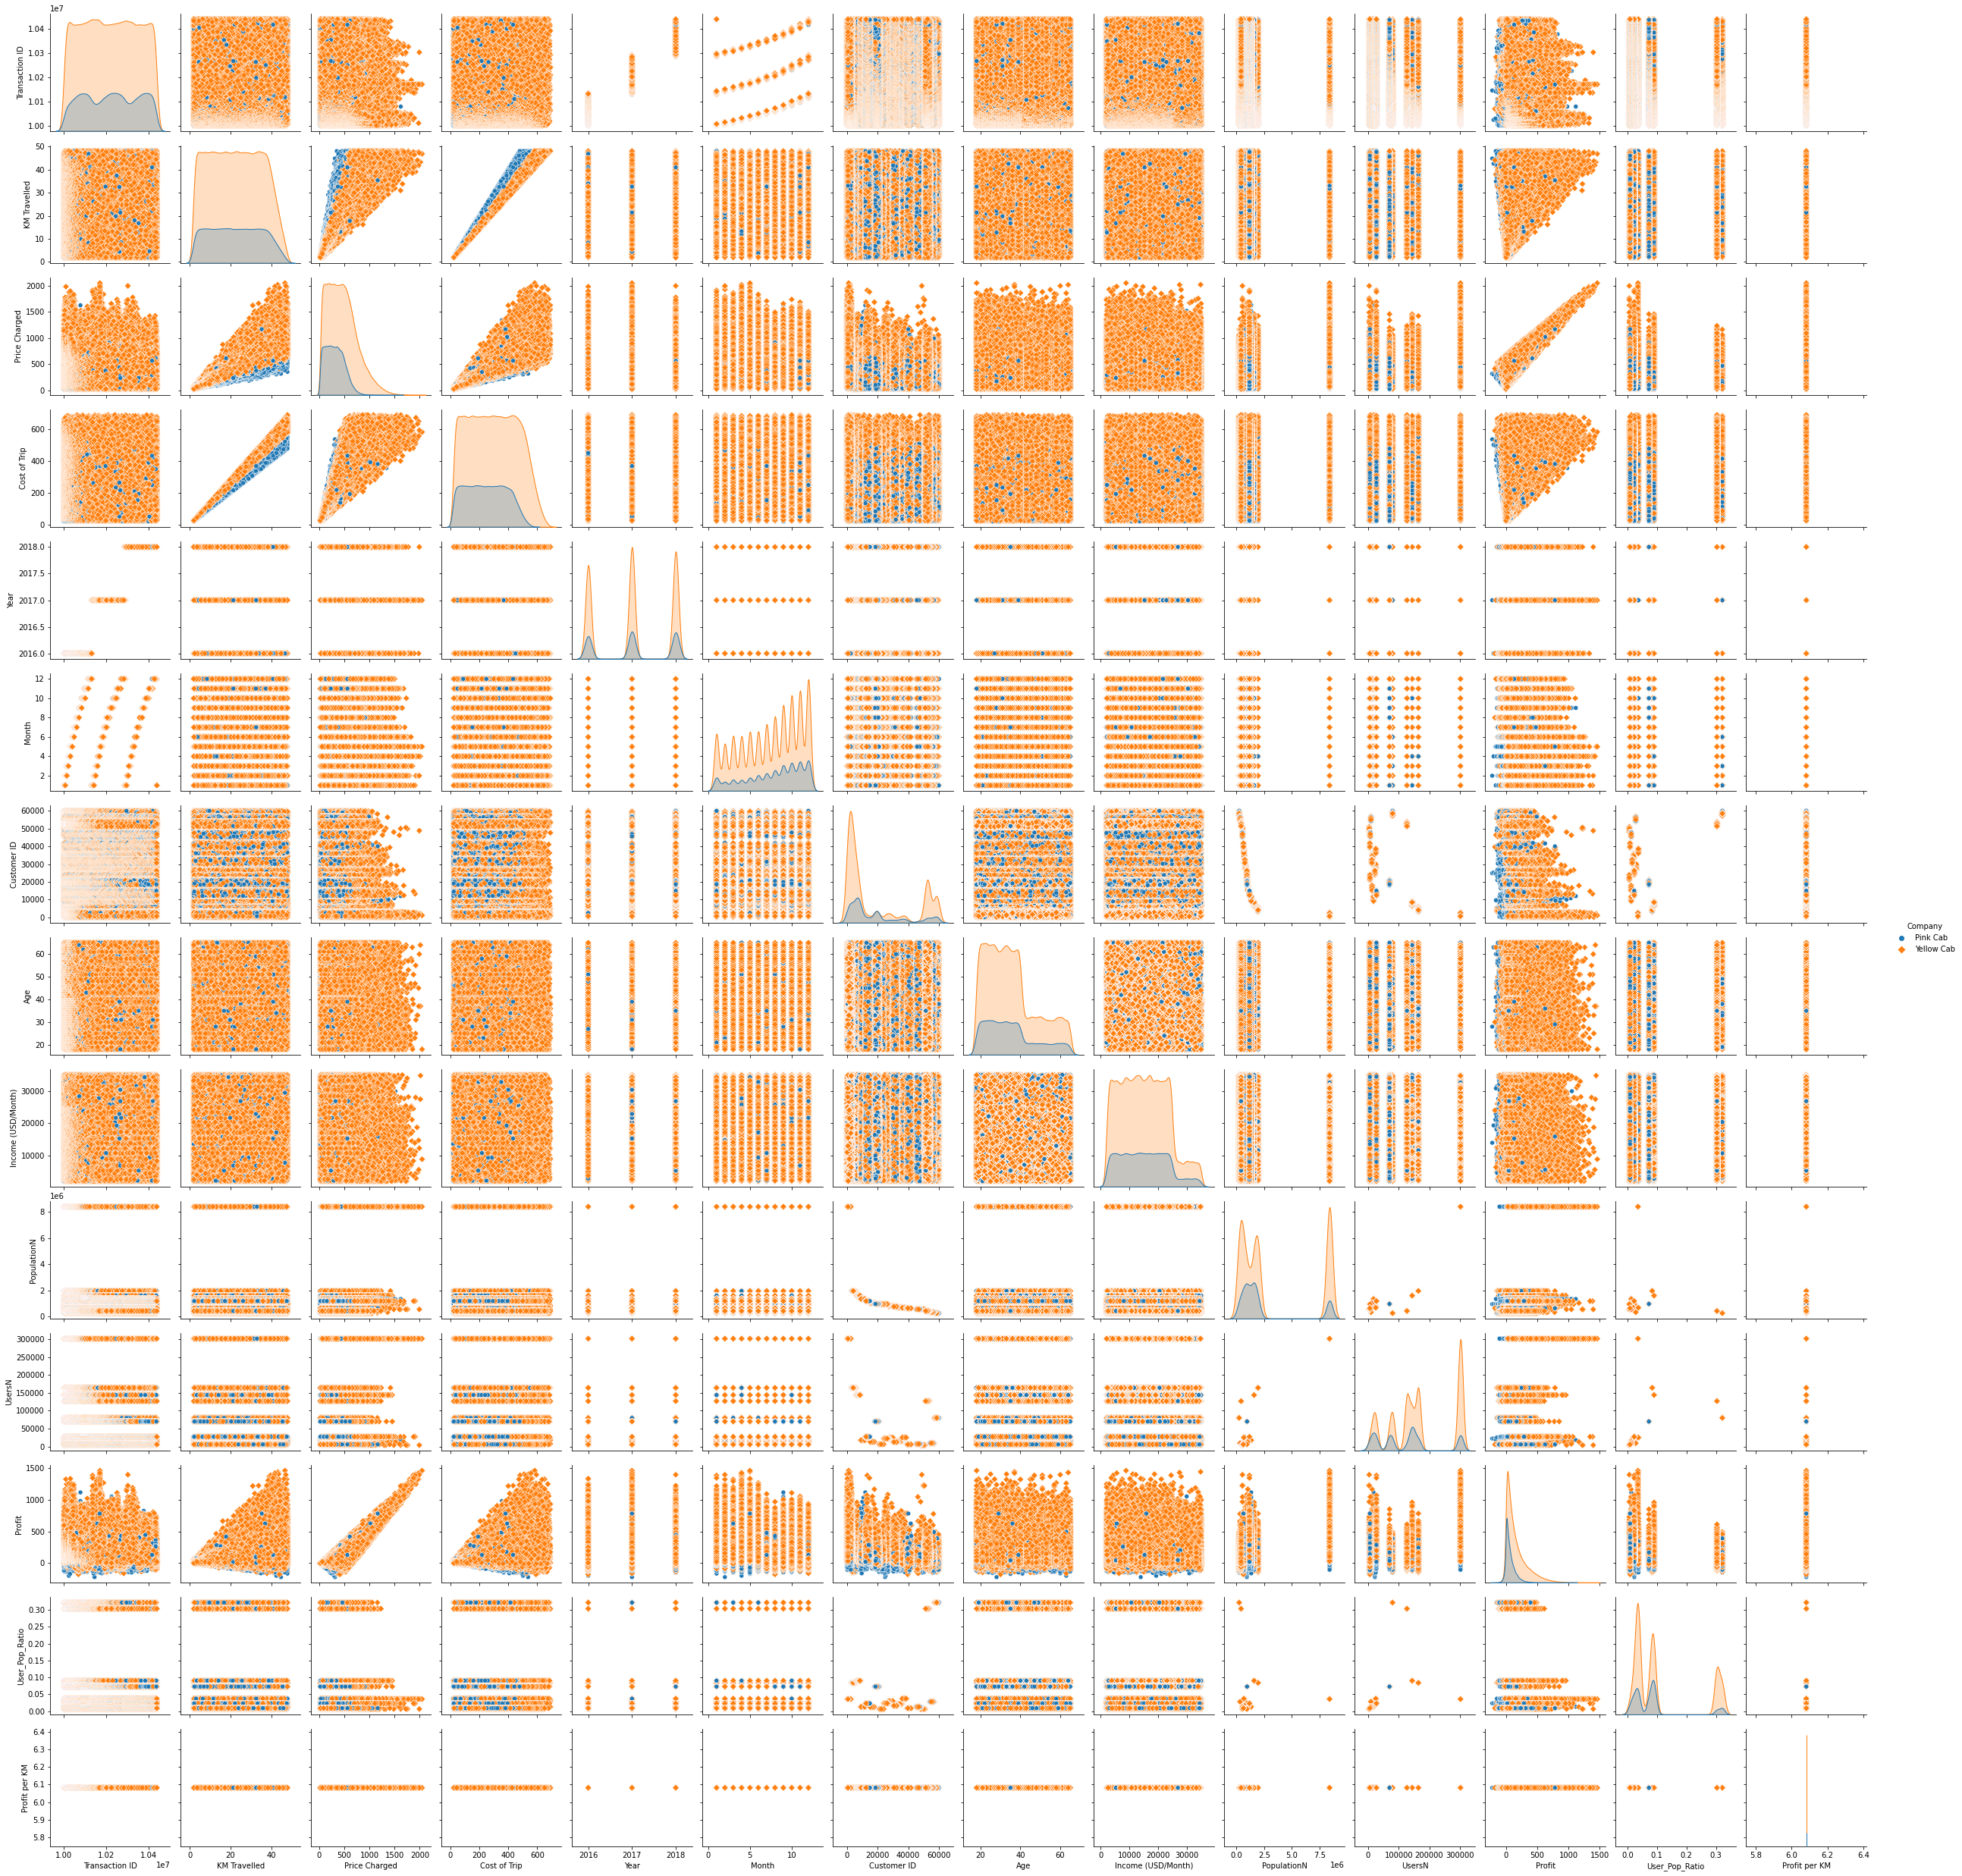

In [19]:
#sns.pairplot(df)
sns.pairplot(df, hue="Company", markers=["o", "D"])

## Other plots

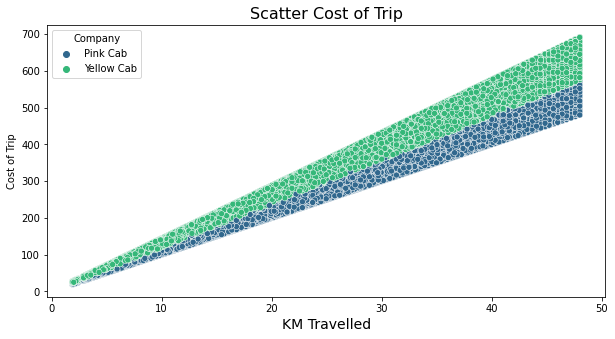

In [7]:
#cmap = sns.cubehelix_palette(rot=-.5, as_cmap=True)  
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="KM Travelled", y="Cost of Trip",  
                     hue="Company", #size='City',  
                     palette='viridis', sizes=(100, 100),  
                     data=df)  ;
plt.ylabel('Cost of Trip')
plt.xlabel('KM Travelled',fontsize = 14)
plt.title('Scatter Cost of Trip',fontsize = 16);


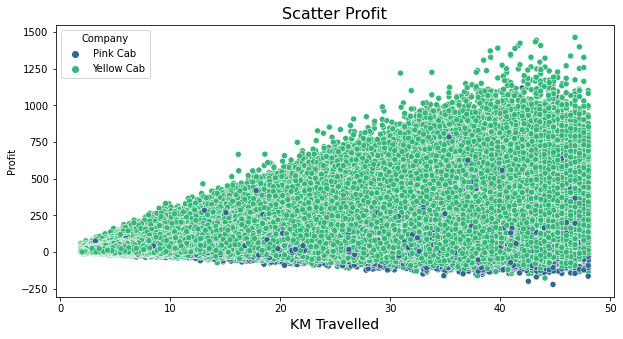

In [8]:
#cmap = sns.cubehelix_palette(rot=-.5, as_cmap=True)  
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="KM Travelled", y="Profit",  
                     hue="Company", #size='City',  
                     palette='viridis', sizes=(100, 100),  
                     data=df)  ;
plt.ylabel('Profit')
plt.xlabel('KM Travelled',fontsize = 14)
plt.title('Scatter Profit',fontsize = 16);

In [9]:
df_cities = df.groupby(['City']).sum()
df_citiesx = df_cities.sort_values(['Profit'], ascending=False).reset_index(drop=False)

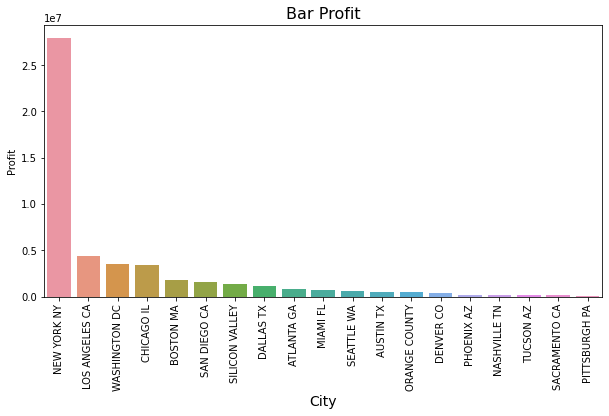

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_citiesx,x='City',y='Profit');
plt.xticks(rotation="90")
plt.ylabel('Profit')
plt.xlabel('City',fontsize = 14)
plt.title('Bar Profit',fontsize = 16);

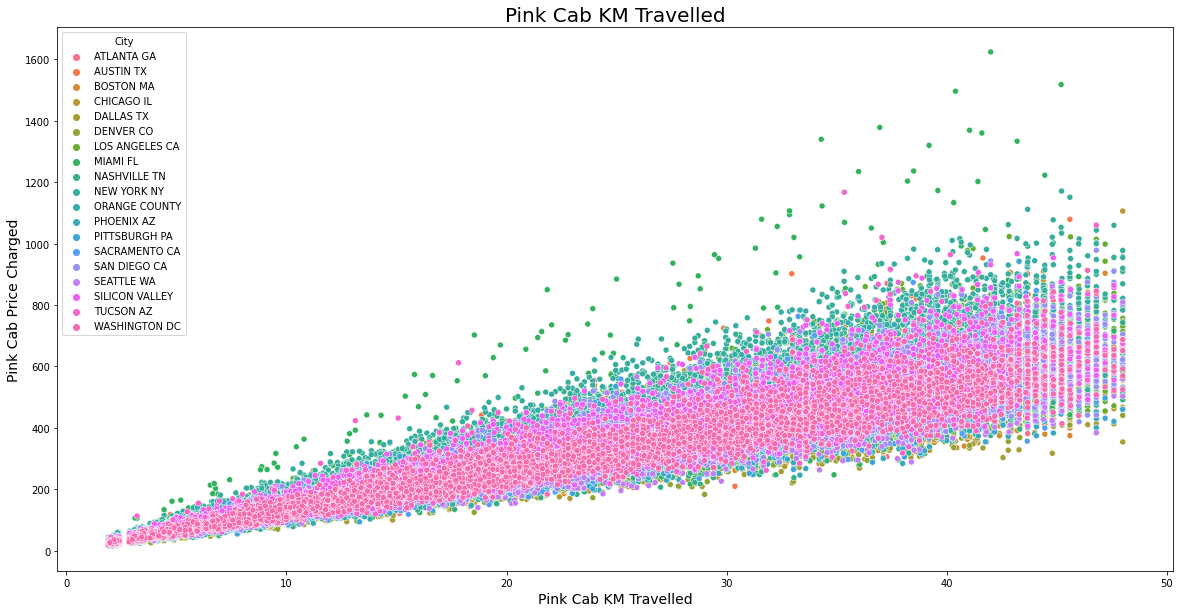

In [23]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df[df['Company']=='Pink Cab'], x='KM Travelled', y='Price Charged', hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)
plt.show()

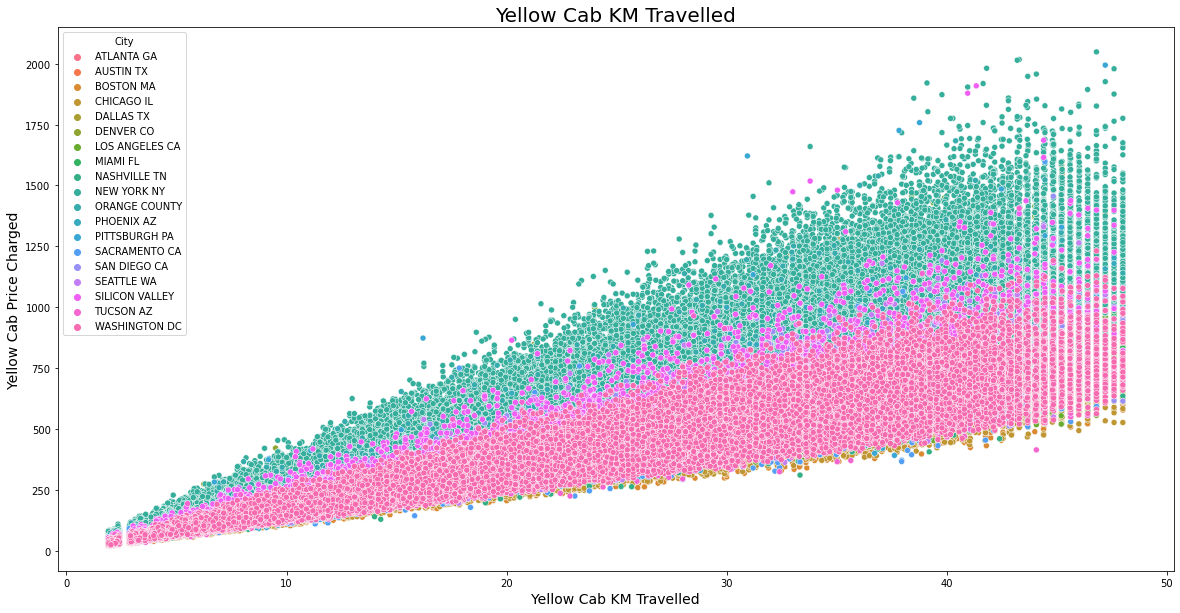

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df[df['Company']=='Yellow Cab'], x="KM Travelled", y='Price Charged', hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)
plt.show()

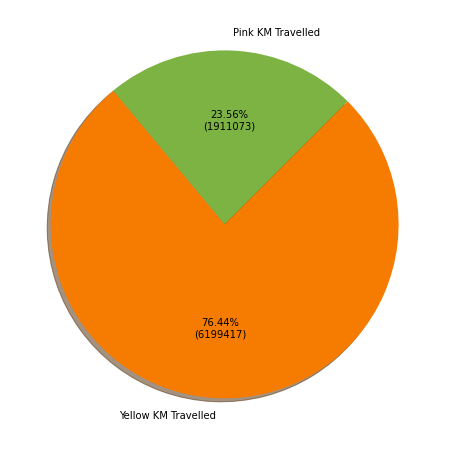

In [25]:
#average
#sns.barplot(data=df,x='Company',y='KM Travelled')
plt.figure(figsize=(8,8))
tickets = [df[df['Company']=='Pink Cab']['KM Travelled'].sum() , df[df['Company']=='Yellow Cab']['KM Travelled'].sum() ]
total = np.sum(tickets)
labels = ['Pink KM Travelled' , 'Yellow KM Travelled']

def val_per(x): 
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

colors = ['#7CB342','#F57C00']
plt.pie(tickets,labels=labels, colors=colors, autopct=val_per, startangle=45, shadow=True)

plt.show()

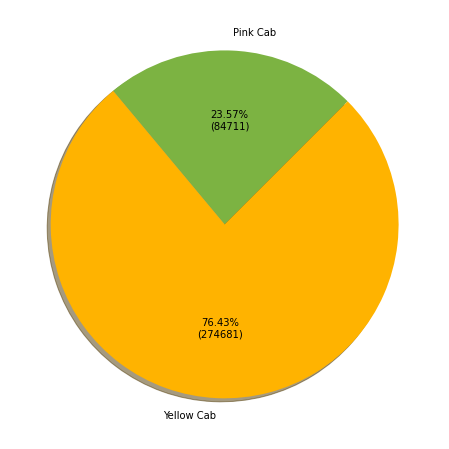

In [26]:
plt.figure(figsize=(8,8))
tickets = [df['Company'].value_counts()[1] , df['Company'].value_counts()[0] ]
total = np.sum(tickets)
labels = ['Pink Cab' , 'Yellow Cab']

def val_per(x): 
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

colors = ['#7CB342','#FFB300']
plt.pie(tickets,labels=labels, colors=colors, autopct=val_per, startangle=45, shadow=True)

plt.show()

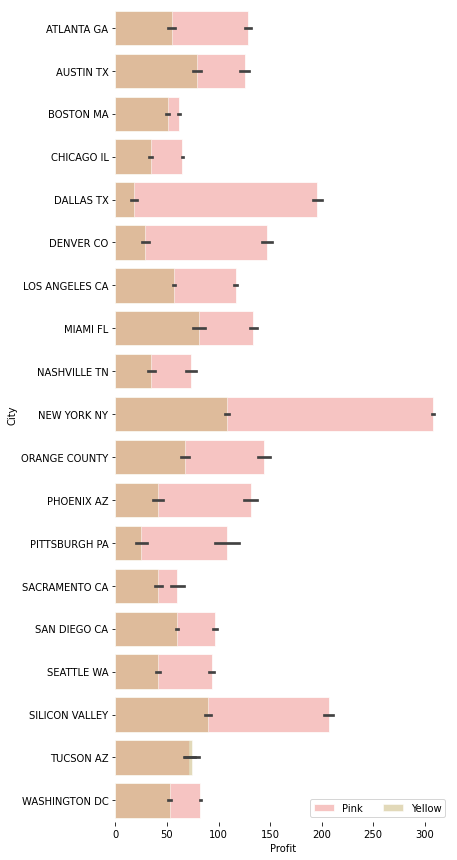

In [27]:
f, ax = plt.subplots(figsize = (6,15))
sns.set_color_codes('pastel')
sns.barplot(x = 'Profit', y = 'City', data = df[df['Company']=='Yellow Cab'],
            label = 'Pink', color = 'r', edgecolor = 'w', alpha=0.7)
sns.set_color_codes('muted')
sns.barplot(x = 'Profit', y = 'City', data = df[df['Company']=='Pink Cab'],
            label = 'Yellow', color = 'y', edgecolor = 'w', alpha=0.5)
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

In [94]:
profit_gender = df.groupby(['City'])
prof_gender = profit_gender.sum()

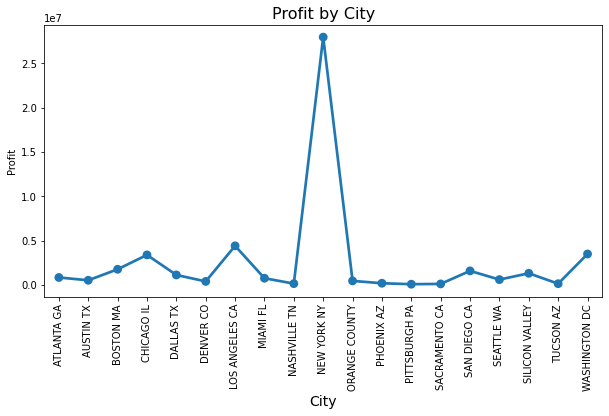

In [97]:
plt.figure(figsize=(10,5))
sns.pointplot(x=prof_gender.index, y='Profit', 
              #hue="Gender", 
              data=prof_gender)
plt.ylabel('Profit')
plt.xlabel('City',fontsize = 14)
plt.xticks(rotation=90)
plt.title('Profit by City',fontsize = 16);

In [94]:
#np.sort(df.Age.unique())
conditions = [
    (df['Age'] >= 18 ) & (df['Age'] <= 30 ),
    (df['Age'] > 30 ) & (df['Age'] <= 45),
    (df['Age'] > 45 )]
choices = ['Medium', 'Adult', 'Ancient']

df['AgeN'] = np.select(conditions, choices, default='black')

In [52]:
profit_company = df.groupby(['AgeN','Company'])
prof_company = profit_company.sum()

In [ ]:
prof_company.head()

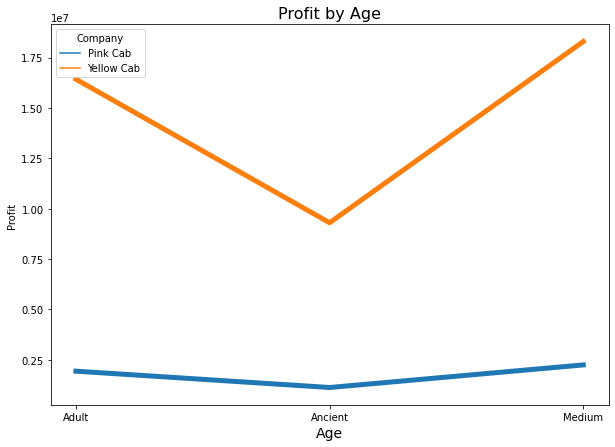

In [61]:
plt.figure(figsize=(10,7))
sns.lineplot(x='AgeN', y='Profit' ,data=prof_company, 
             #label='Pink', 
             color='y',lw=5, hue='Company')
#sns.lineplot(x='AgeN', y='Profit' ,data=prof_company, label='Yellow', color='pink',lw=5)
plt.ylabel('Profit')
plt.xlabel('Age',fontsize = 14)
#plt.yscale('log')
plt.title('Profit by Age',fontsize = 16);

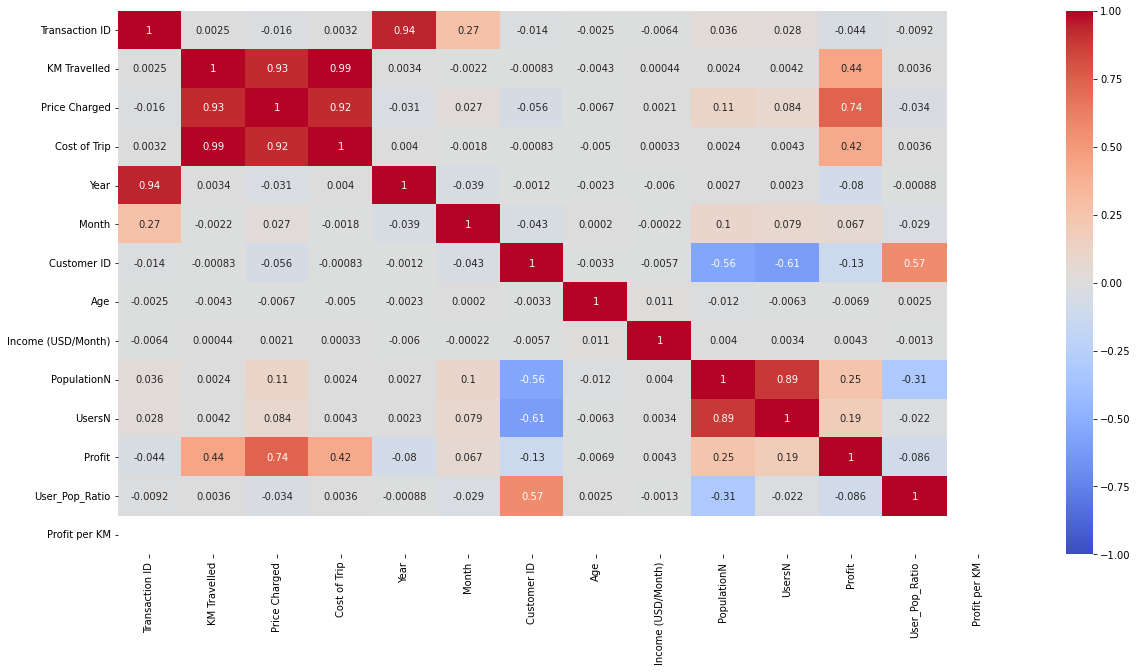

In [32]:
#pearson : standard correlation coefficient
#kendall : Kendall Tau correlation coefficient
#spearman : Spearman rank correlation

Pink_Cab_Corr = df[df['Company']=='Pink Cab'].corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(Pink_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

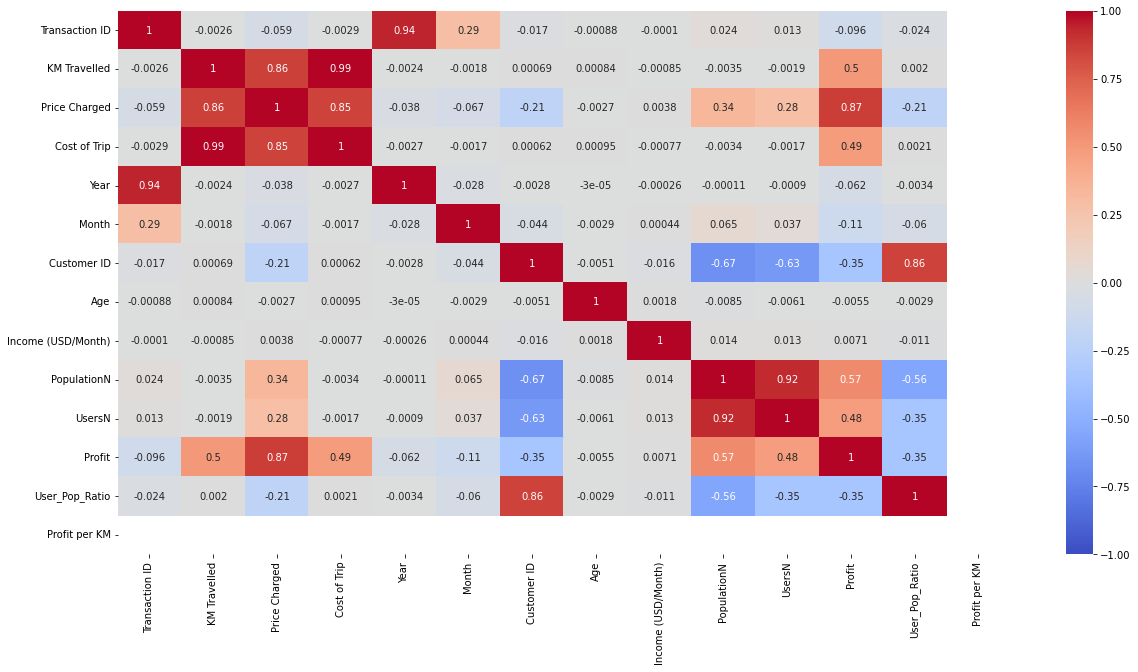

In [33]:
Yellow_Cab_Corr = df[df['Company']=='Yellow Cab'].corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(Yellow_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [34]:
import plotly.express as px

df_gc_city = df.groupby("City").count()
fig1 = px.pie(df_gc_city,
                        values=df_gc_city.UsersN,
                        names=df_gc_city.index ,title="Total Users Overview by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

In [35]:
df_gs_city = df.groupby("City").sum()
fig1 = px.pie(df_gs_city,
                        values=df_gs_city.Profit,
                        names=df_gs_city.index ,title="Total Market Profit Share by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

# Hypothesis

## Is there any seasonality in the number of customers using the taxi service?"


In [5]:
profit_gender = df.groupby(['Gender','Company'])
prof_gender = profit_gender.sum()

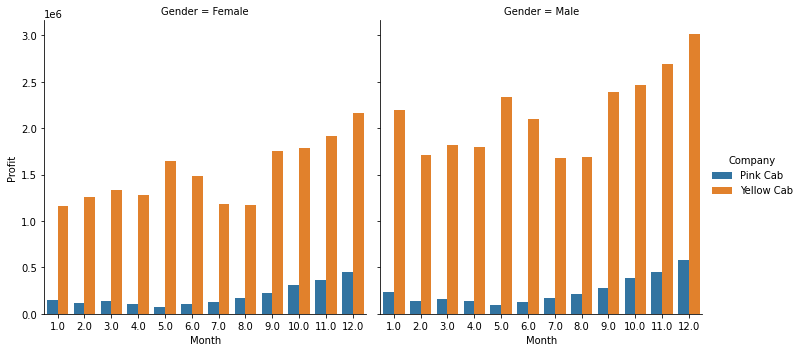

In [20]:
sns.catplot(kind='bar', data=df, col='Gender', x='Month', y='Profit', hue='Company', estimator=sum, ci=None,
            order=sorted(df.Month.unique()), col_order=sorted(df.Gender.unique()))

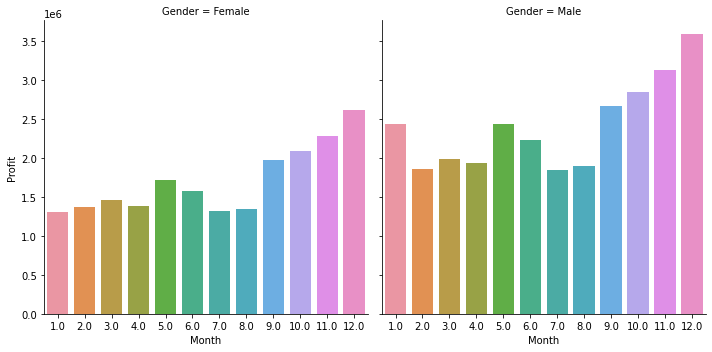

In [28]:
sns.catplot(kind='bar', data=df, col='Gender', x='Month', y='Profit', estimator=sum, ci=None,
            order=sorted(df.Month.unique()), col_order=sorted(df.Gender.unique()))

* Men use the service more.
* Regardless of gender, the service is mostly used in the last 4 months of the year.

## Which company has the maximum number of taxi users in a given period of time?



In [46]:
dftime=df.copy() #set_index('Date_of_Travel')

In [47]:
dftime['Date'] = pd.to_datetime(df['Date_of_Travel'])
dftime_month = dftime.resample('MS', on='Date').sum()

dftime['Date'] = pd.to_datetime(df[df['Company']=='Pink Cab']['Date_of_Travel'])
dftime_month_pink = dftime.resample('MS', on='Date').sum()

dftime['Date'] = pd.to_datetime(df[df['Company']=='Yellow Cab']['Date_of_Travel'])
dftime_month_yellow = dftime.resample('MS', on='Date').sum()

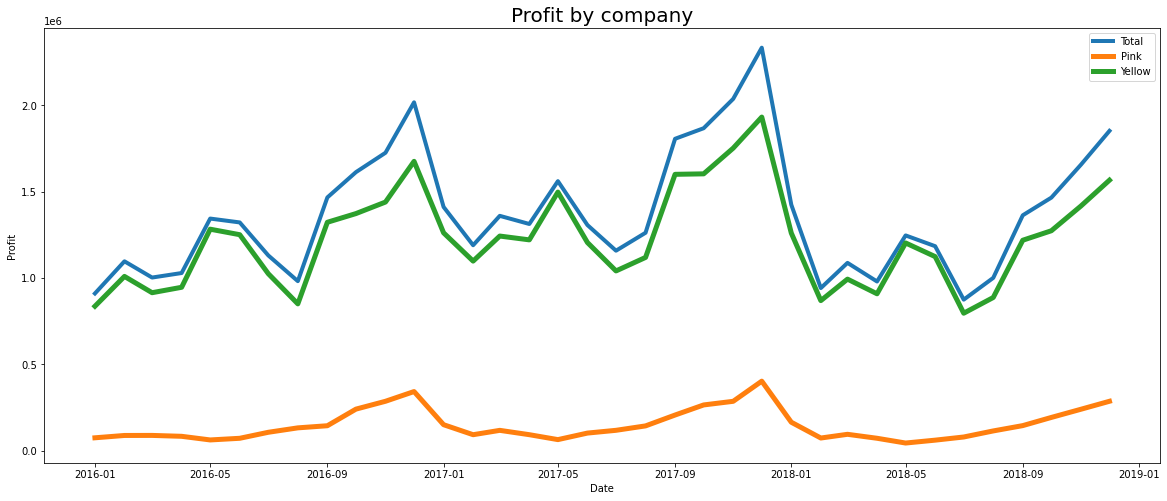

In [40]:
plt.figure(figsize=(20,8))
sns.lineplot(data=dftime_month['Profit'], label='Total',lw=4)
sns.lineplot(data=dftime_month_pink['Profit'], label='Pink', lw=5)
sns.lineplot(data=dftime_month_yellow['Profit'], label='Yellow', lw=5)
plt.title('Profit by company', fontsize=20)
plt.legend()

In the final months of each year, independent of any variable, yellow cab has the highest number of users.

## Does the margin increase proportionally with the increase in the number of customers?



In [43]:
df['Margin'] = df['Profit']/df['Income (USD/Month)']*100

In [89]:
filtered_dftime=dftime.query("Date_of_Travel >= '2016-01-01' and Date_of_Travel <='2016-01-31'")
filtered_dftime['Margin'].sum()

9257.101435136017

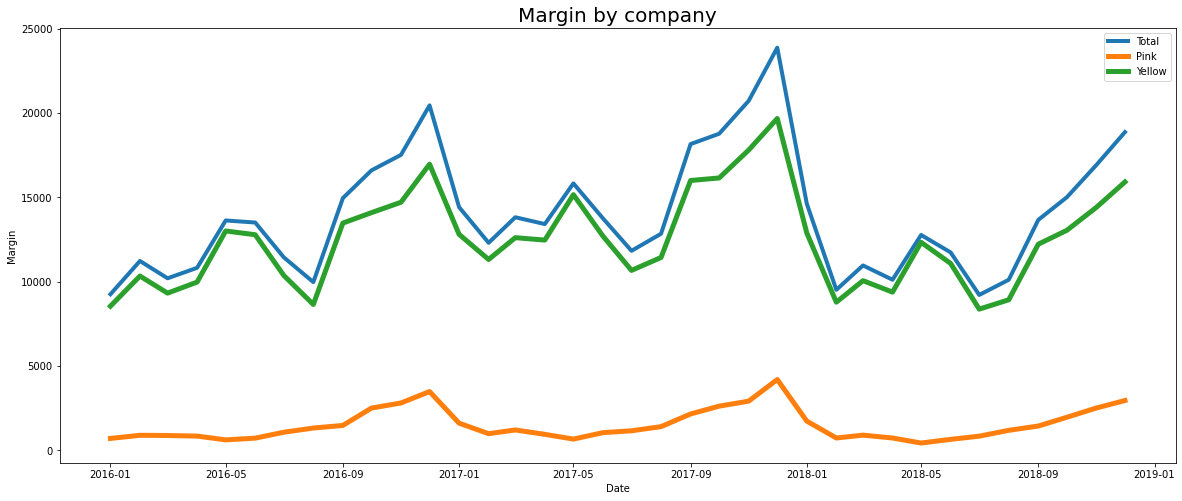

In [55]:
plt.figure(figsize=(20,8))
sns.lineplot(x=dftime_month.index, y='Margin', data=dftime_month, label='Total',lw=4)
sns.lineplot(data=dftime_month_pink['Margin'], label='Pink', lw=5)
sns.lineplot(data=dftime_month_yellow['Margin'], label='Yellow', lw=5)
plt.title('Margin by company', fontsize=20)
plt.legend()

In [93]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Date_of_Travel', 'Year', 'Month', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'PopulationN',
       'UsersN', 'Profit', 'User_Pop_Ratio', 'Profit per KM', 'Margin'],
      dtype='object')

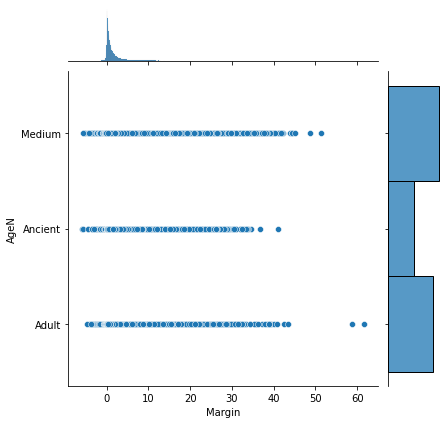

In [95]:
sns.jointplot(data=df, x='Margin', y='AgeN')

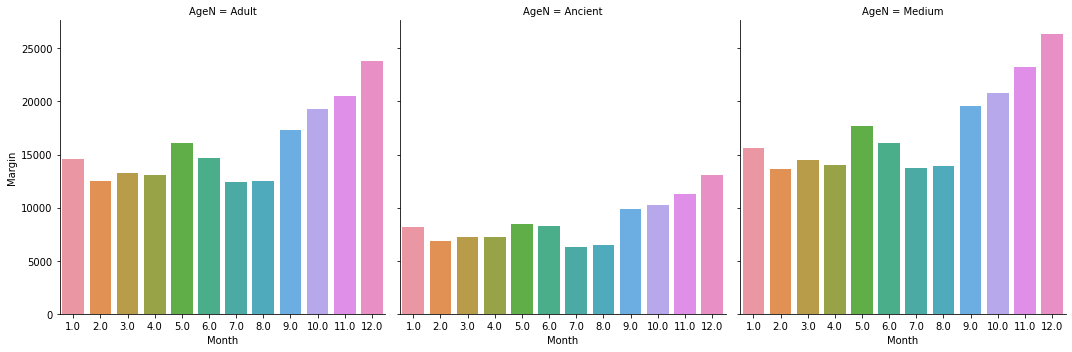

In [97]:
sns.catplot(kind='bar', data=df, col='AgeN', x='Month', y='Margin', estimator=sum, ci=None,
            order=sorted(df.Month.unique()), col_order=sorted(df.AgeN.unique()))

The margin does increase with the increase in customers, especially the young public and adults.

## Data Master

In [99]:
df.to_csv('data_master.csv',index = False)